<a href="https://colab.research.google.com/github/pankajroy97/CIP-Data-Science-Internship/blob/main/IMDB_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Data:-

Poster_Link - Link of the poster that imdb using

Series_Title = Name of the movie

Released_Year - Year at which that movie released

Certificate - Certificate earned by that movie

Runtime - Total runtime of the movie

Genre - Genre of the movie

IMDB_Rating - Rating of the movie at IMDB site

Overview - mini story/ summary

Meta_score - Score earned by the movie

Director - Name of the Director

Star1,Star2,Star3,Star4 - Name of the Stars

No_of_votes - Total number of votes

Gross - Money earned by that movie

In [154]:
# Importing Matplotlib
import matplotlib.pyplot as plt
# plt is athe alias name for pyplot
import pandas as pd
# pd is the alias for pandas
import seaborn as sns
# seaborn is aliased as sns
import numpy as np


import warnings
warnings.filterwarnings("ignore")

In [155]:
df=pd.read_csv('/content/imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [156]:
df.shape

(1000, 16)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


##Handling the null values

In [158]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [159]:
#Fill null values from Certificate categorical column
df['Certificate'].fillna(df['Certificate'].mode().values[0],inplace=True)
df['Meta_score'].fillna(df['Meta_score'].mean(),inplace=True)

In [160]:
df.dropna(axis=0,inplace=True)

In [161]:
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [162]:
df.drop('Poster_Link',axis=1,inplace=True)

In [163]:
df.shape

(831, 15)

In [164]:
df.duplicated().sum()

0

In [165]:
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', '2017', '2012', '2009', '2007', '1984',
       '1981', '1979', '1964', '1940', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1971', '1965', '1962', '1959', '1958',
       '1952', '1948', '1944', '1941', '1927', '1921', '2015', '2013',
       '2005', '1989', '1963', '1955', '1950', '1925', '1924', '1996',
       '1982', '1978', '1967', '1951', '1949', '1939', '1937', '1934',
       '1928', '1926', '1970', '1969', '1961', '1946', '1930', '1956',
       '1947', '1945', '1938', '1935', '1933', 'PG', '1953'], dtype=object)

In [166]:
df[df['Released_Year']=='PG'].shape

(1, 15)

In [167]:
df['Released_Year'].replace('PG',np.nan,inplace=True)
df.dropna(axis=0,inplace=True)

In [168]:
df['Gross']=df['Gross'].apply(lambda x:str(x).replace(',',''))
df['Gross']=df['Gross'].astype('int')
df['Gross']=df['Gross'].apply(lambda x:int(x)/100000)

In [169]:
df=df.rename(columns={'Gross':'Gross in Lakh'})

In [170]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross in Lakh
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,283.41469
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,1349.66411
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,5348.58444
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,573.00000
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,43.60000


In [171]:
df['Gross in Lakh'].info()

<class 'pandas.core.series.Series'>
Int64Index: 830 entries, 0 to 997
Series name: Gross in Lakh
Non-Null Count  Dtype  
--------------  -----  
830 non-null    float64
dtypes: float64(1)
memory usage: 13.0 KB


In [172]:
df['Runtime'].unique()

array(['142 min', '175 min', '152 min', '202 min', '96 min', '201 min',
       '154 min', '195 min', '148 min', '139 min', '178 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '132 min',
       '169 min', '130 min', '125 min', '189 min', '116 min', '127 min',
       '118 min', '121 min', '207 min', '122 min', '106 min', '112 min',
       '151 min', '150 min', '155 min', '119 min', '110 min', '88 min',
       '137 min', '165 min', '109 min', '102 min', '87 min', '126 min',
       '117 min', '181 min', '149 min', '105 min', '164 min', '170 min',
       '98 min', '101 min', '113 min', '134 min', '229 min', '115 min',
       '147 min', '95 min', '123 min', '131 min', '153 min', '108 min',
       '104 min', '89 min', '81 min', '99 min', '160 min', '114 min',
       '129 min', '228 min', '128 min', '103 min', '143 min', '107 min',
       '68 min', '138 min', '167 min', '163 min', '186 min', '135 min',
       '140 min', '180 min', '158 min', '210 min', '156 min'

In [173]:
df['Runtime']=df['Runtime'].apply(lambda x:str(x).replace(' min',''))

In [174]:
df['Runtime'].unique()

array(['142', '175', '152', '202', '96', '201', '154', '195', '148',
       '139', '178', '161', '179', '136', '146', '124', '133', '132',
       '169', '130', '125', '189', '116', '127', '118', '121', '207',
       '122', '106', '112', '151', '150', '155', '119', '110', '88',
       '137', '165', '109', '102', '87', '126', '117', '181', '149',
       '105', '164', '170', '98', '101', '113', '134', '229', '115',
       '147', '95', '123', '131', '153', '108', '104', '89', '81', '99',
       '160', '114', '129', '228', '128', '103', '143', '107', '68',
       '138', '167', '163', '186', '135', '140', '180', '158', '210',
       '156', '86', '162', '91', '172', '45', '145', '196', '93', '120',
       '144', '80', '183', '111', '100', '141', '92', '224', '171', '188',
       '94', '205', '212', '238', '67', '159', '83', '76', '90', '84',
       '191', '197', '174', '75', '157', '209', '97', '82', '220', '85',
       '184', '168', '166', '192', '194', '193', '72', '242', '79', '71',
      

In [175]:
df['Runtime']=df['Runtime'].apply(lambda x:int(x))
df['Runtime'].info()

<class 'pandas.core.series.Series'>
Int64Index: 830 entries, 0 to 997
Series name: Runtime
Non-Null Count  Dtype
--------------  -----
830 non-null    int64
dtypes: int64(1)
memory usage: 13.0 KB


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   830 non-null    object 
 1   Released_Year  830 non-null    object 
 2   Certificate    830 non-null    object 
 3   Runtime        830 non-null    int64  
 4   Genre          830 non-null    object 
 5   IMDB_Rating    830 non-null    float64
 6   Overview       830 non-null    object 
 7   Meta_score     830 non-null    float64
 8   Director       830 non-null    object 
 9   Star1          830 non-null    object 
 10  Star2          830 non-null    object 
 11  Star3          830 non-null    object 
 12  Star4          830 non-null    object 
 13  No_of_Votes    830 non-null    int64  
 14  Gross in Lakh  830 non-null    float64
dtypes: float64(3), int64(2), object(10)
memory usage: 103.8+ KB


In [177]:
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', '2017', '2012', '2009', '2007', '1984',
       '1981', '1979', '1964', '1940', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1971', '1965', '1962', '1959', '1958',
       '1952', '1948', '1944', '1941', '1927', '1921', '2015', '2013',
       '2005', '1989', '1963', '1955', '1950', '1925', '1924', '1996',
       '1982', '1978', '1967', '1951', '1949', '1939', '1937', '1934',
       '1928', '1926', '1970', '1969', '1961', '1946', '1930', '1956',
       '1947', '1945', '1938', '1935', '1933', '1953'], dtype=object)

###Lets Some EDA in this Dataset

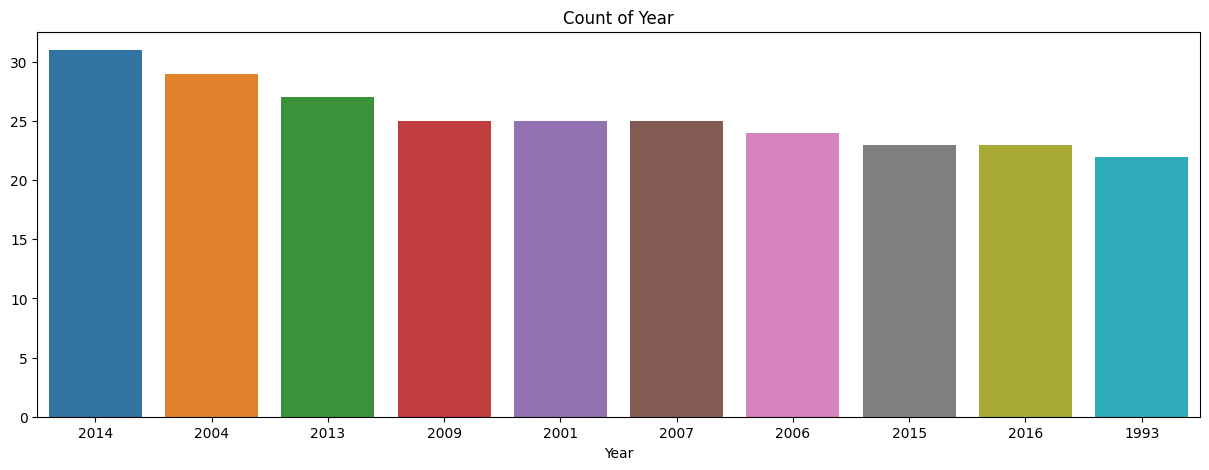

In [178]:
#Find which year released maximum movies
x=df['Released_Year'].value_counts()
x1=x.sort_values(ascending=False)
x2=x1.head(10)
plt.figure(figsize=(15,5))
sns.barplot(x=x2.index,y=x2.values)
plt.xlabel('Year')
plt.title('Count of Year')
plt.show()

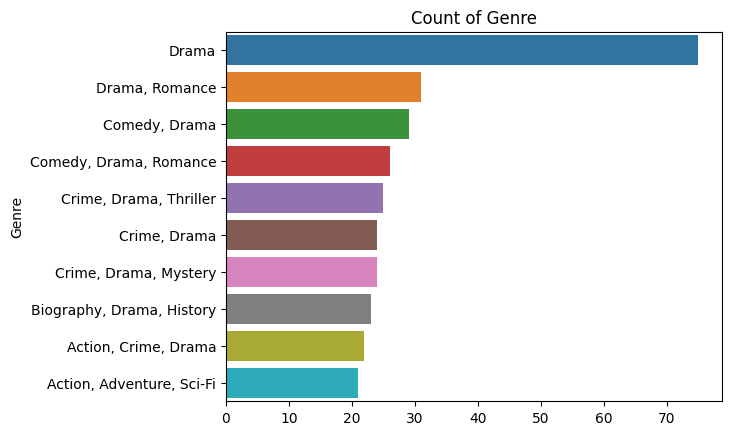

In [179]:
#Find top 10 Genre 
x=df['Genre'].value_counts()
x1=x.sort_values(ascending=False)
x2=x1.head(10)
sns.barplot(x=x2.values,y=x2.index)
plt.title('Count of Genre')
plt.ylabel('Genre')
plt.show()

U         245
A         180
UA        163
R         135
PG-13      39
PG         24
Passed     23
G          10
Name: Certificate, dtype: int64


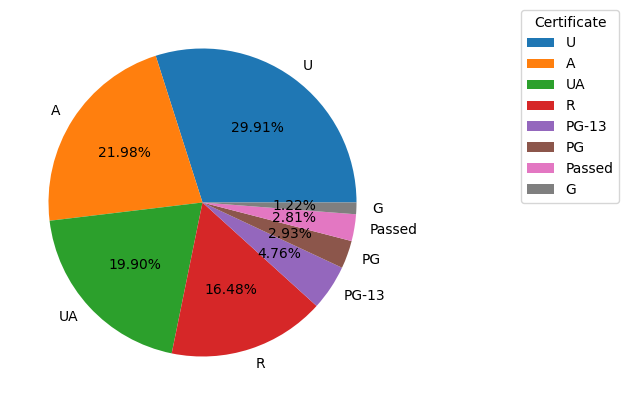

In [180]:
#Find count of each certificate
plt.figure(figsize=(20,5))
df['Certificate'].unique()
x=df['Certificate'].value_counts()
x1=x.sort_values(ascending=False)
x2=x1.head(8)
print(x2)
plt.pie(x=x2.values,labels=x2.index,autopct="%.2f%%")
plt.legend(x2.index,title='Certificate',loc='right',bbox_to_anchor=(1,1,0.6,-0.5))
plt.show()

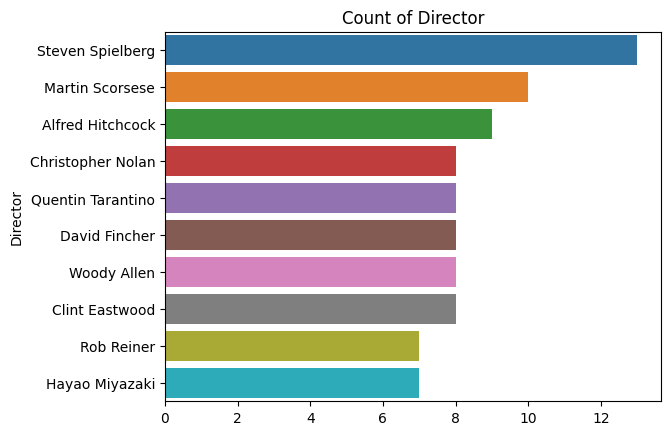

In [181]:
#which Director doing maximum number of movies in this dataset 
df['Director'].nunique()
x=df['Director'].value_counts()
x1=x.sort_values(ascending=False)
x2=x1.head(10)
sns.barplot(x=x2.values,y=x2.index)
plt.title('Count of Director')
plt.ylabel('Director')
plt.show()

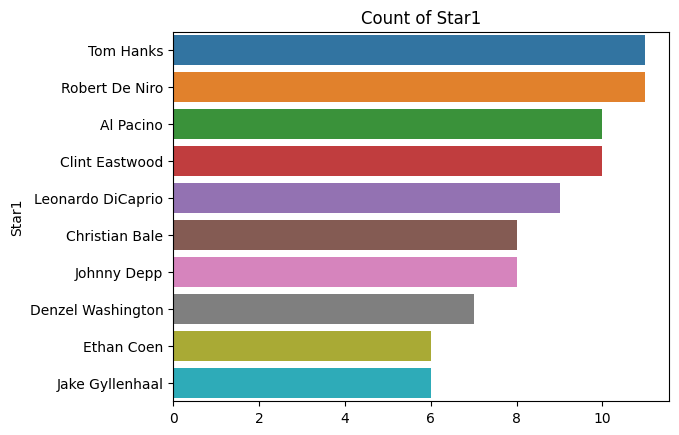

In [182]:
##which star1 doing maximum number of movies in this dataset 
df['Star1'].nunique()
x=df['Star1'].value_counts()
x1=x.sort_values(ascending=False)
x2=x1.head(10)
sns.barplot(x=x2.values,y=x2.index)
plt.title('Count of Star1')
plt.ylabel('Star1')
plt.show()

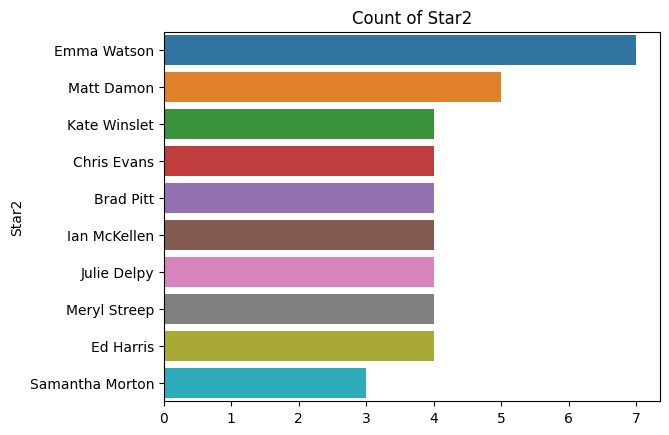

In [183]:
##which star2 doing maximum number of movies in this dataset 
df['Star2'].nunique()
x=df['Star2'].value_counts()
x1=x.sort_values(ascending=False)
x2=x1.head(10)
sns.barplot(x=x2.values,y=x2.index)
plt.title('Count of Star2')
plt.ylabel('Star2')
plt.show()

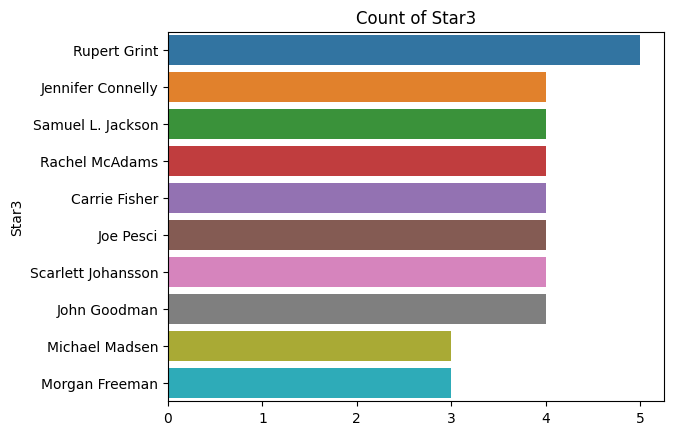

In [184]:
#which star3 doing maximum number of movies in this dataset 
df['Star3'].nunique()
x=df['Star3'].value_counts()
x1=x.sort_values(ascending=False)
x2=x1.head(10)
sns.barplot(x=x2.values,y=x2.index)
plt.title('Count of Star3')
plt.ylabel('Star3')
plt.show()

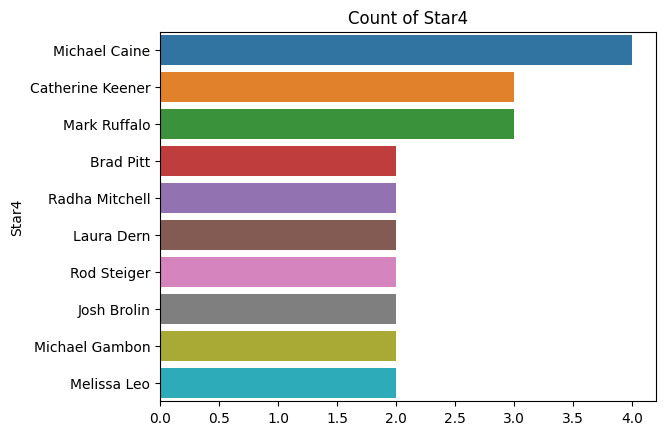

In [185]:
#which star4 doing maximum number of movies in this dataset 
df['Star4'].nunique()
x=df['Star4'].value_counts()
x1=x.sort_values(ascending=False)
x2=x1.head(10)
sns.barplot(x=x2.values,y=x2.index)
plt.title('Count of Star4')
plt.ylabel('Star4')
plt.show()

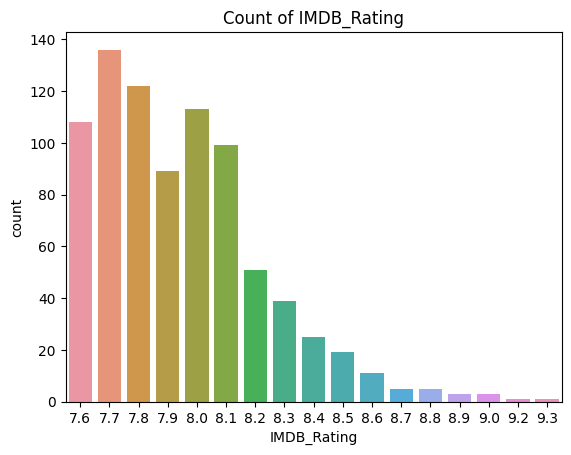

In [186]:
#which Rating geting maximum movies in this Dataset    
df['IMDB_Rating'].unique()
sns.countplot(x=df['IMDB_Rating'])
plt.title('Count of IMDB_Rating')
plt.show()

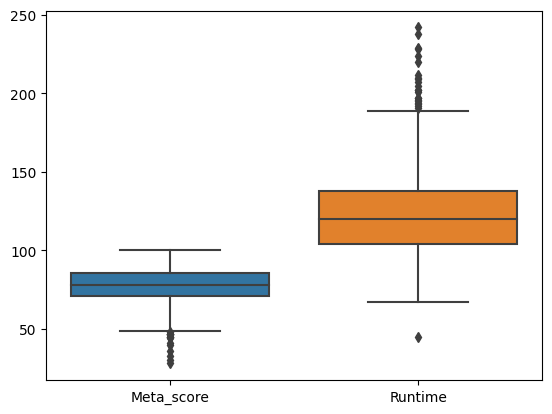

In [187]:
sns.boxplot(df[['Meta_score','Runtime']])
plt.show()

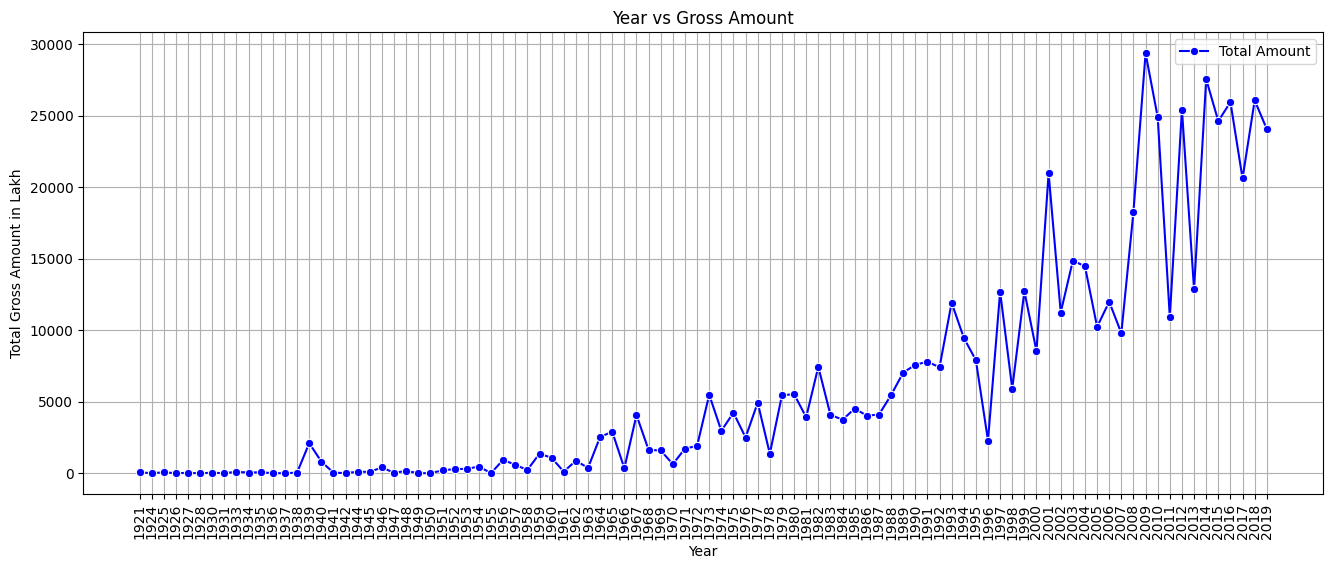

In [188]:
#Year vs Gross Amount
plt.figure(figsize=(16,6))
y_g=df.groupby('Released_Year')['Gross in Lakh'].sum()
sns.lineplot(x=y_g.index,y=y_g.values,label='Total Amount',color='blue',marker='o')
plt.xlabel('Year')
plt.ylabel('Total Gross Amount in Lakh')
plt.title('Year vs Gross Amount')
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

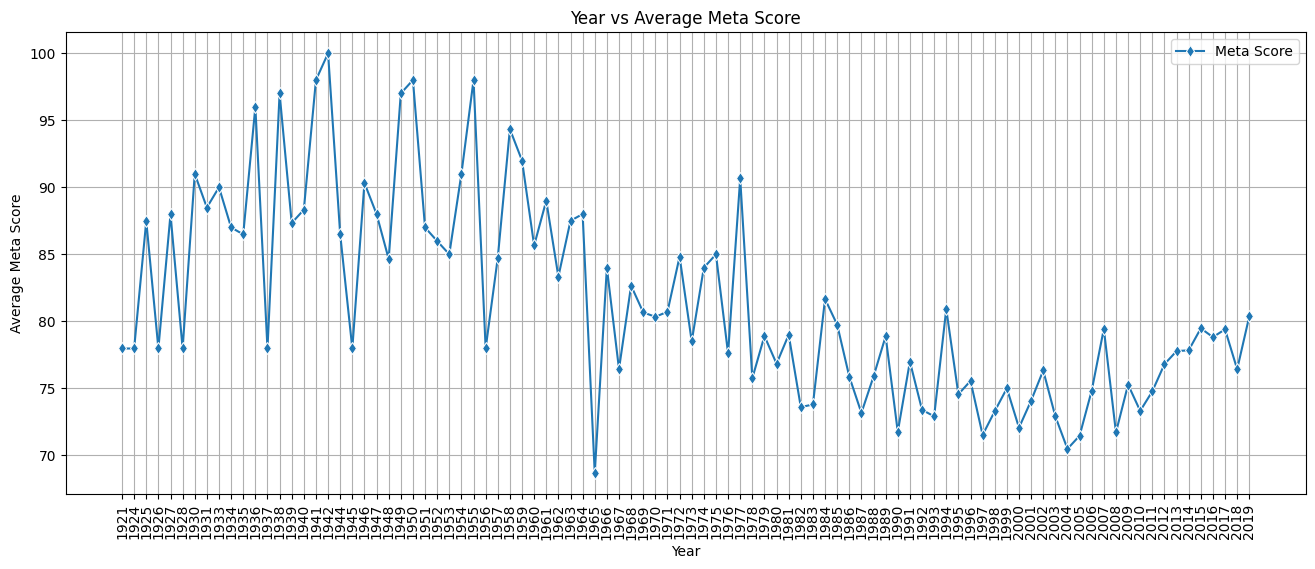

In [189]:
##Year vs Average Meta Score
plt.figure(figsize=(16,6))
y_ms=df.groupby('Released_Year')['Meta_score'].mean()
sns.lineplot(x=y_ms.index,y=y_ms.values,label='Meta Score',marker='d')
plt.xlabel('Year')
plt.ylabel('Average Meta Score')
plt.title('Year vs Average Meta Score')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

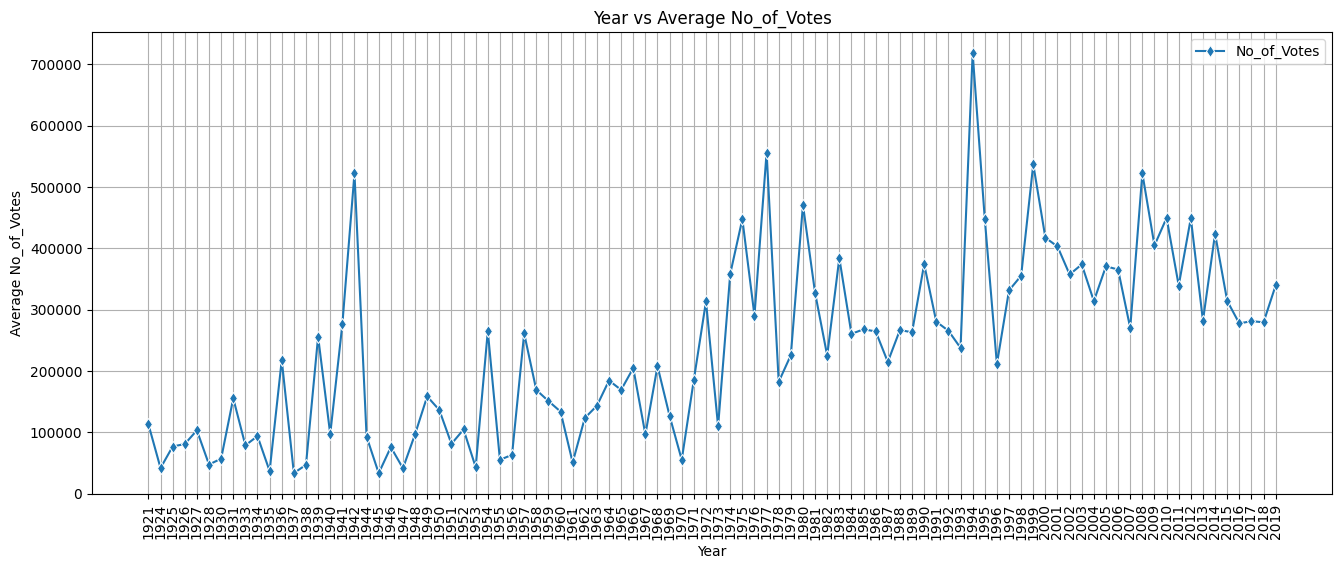

In [190]:
#year vs No_of_Votes
plt.figure(figsize=(16,6))
y_v=df.groupby('Released_Year')['No_of_Votes'].mean()
sns.lineplot(x=y_v.index,y=y_v.values,label='No_of_Votes',marker='d')
plt.xlabel('Year')
plt.ylabel('Average No_of_Votes')
plt.title('Year vs Average No_of_Votes')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

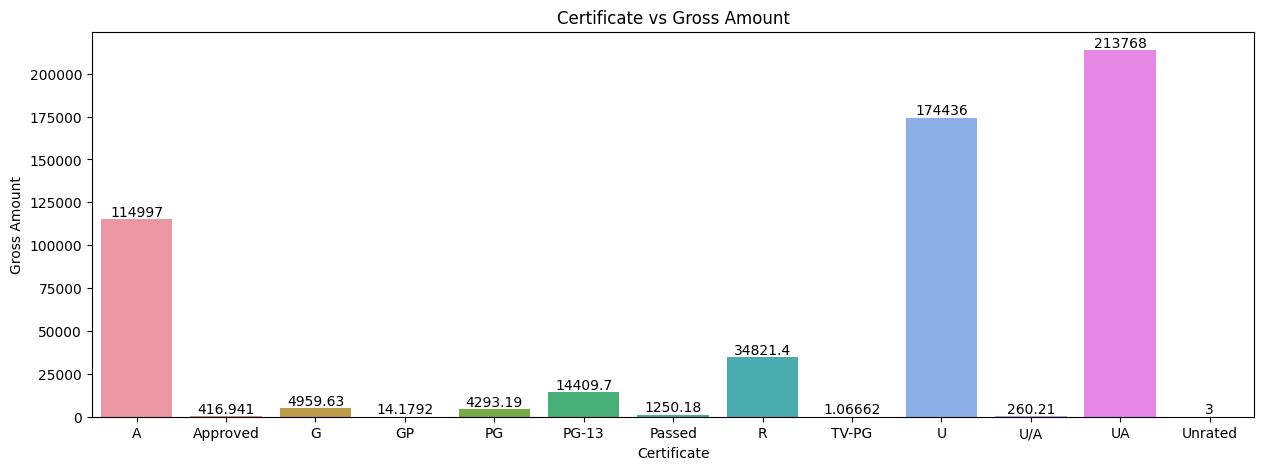

In [191]:
#Certificate vs Gross Amount
plt.figure(figsize=(15,5))
g_g=df.groupby('Certificate')['Gross in Lakh'].sum()
ax=sns.barplot(x=g_g.index,y=g_g.values)
plt.ylabel('Gross Amount')
plt.title('Certificate vs Gross Amount')
ax.bar_label(ax.containers[0])
plt.show()

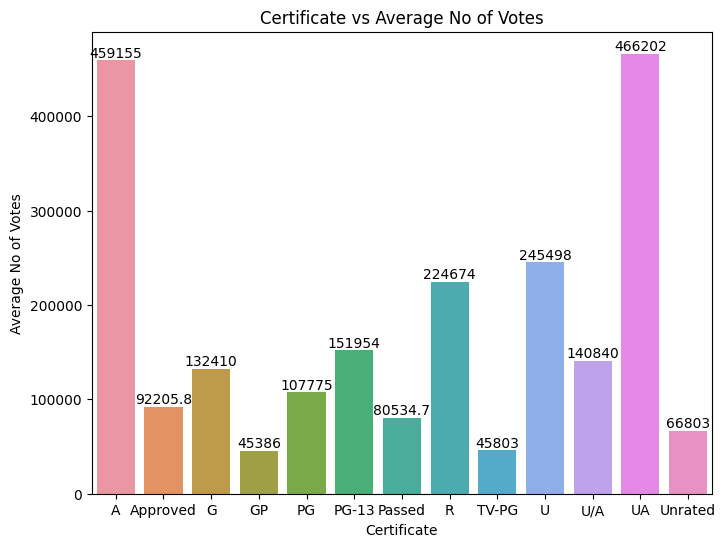

In [192]:
##Certificate vs No_of_Votes
plt.figure(figsize=(8,6))
g_g=df.groupby('Certificate')['No_of_Votes'].mean()
ax=sns.barplot(x=g_g.index,y=g_g.values)
plt.ylabel('Average No of Votes')
plt.title('Certificate vs Average No of Votes')
ax.bar_label(ax.containers[0])
plt.show()

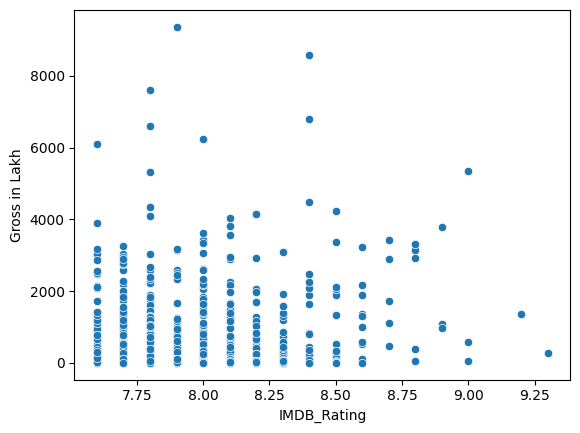

In [193]:
### scatter for relationship of imdb rating and gross
sns.scatterplot(x=df['IMDB_Rating'],y=df['Gross in Lakh'])
plt.show()

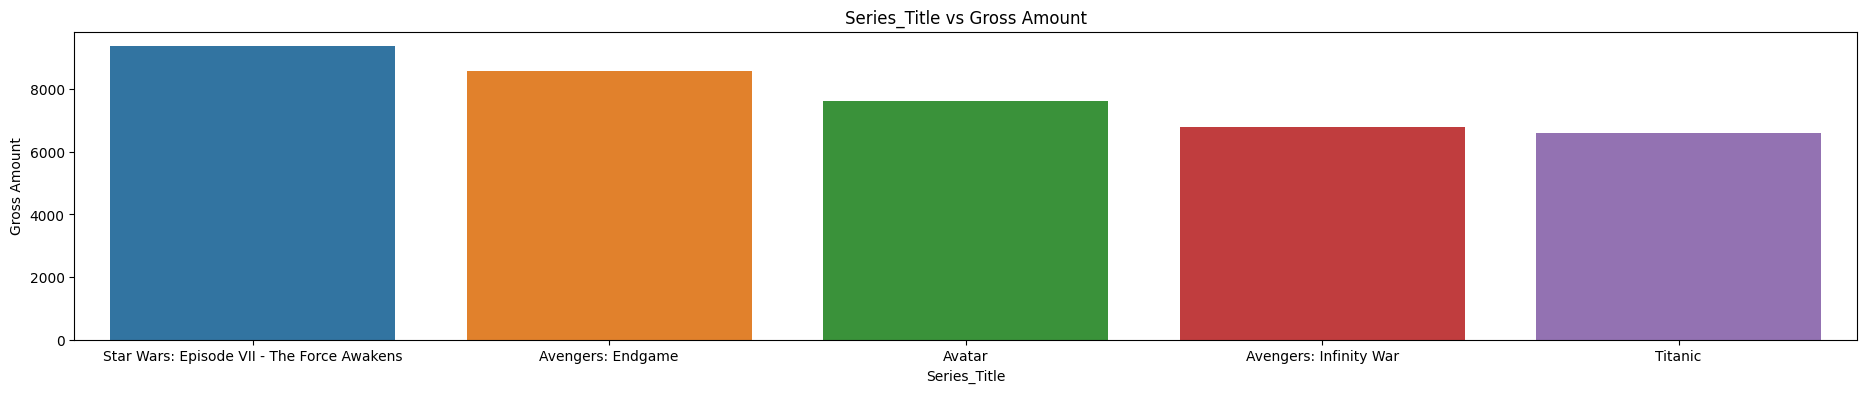

In [194]:
#Top 5 movies which earn highest gross amount
plt.figure(figsize=(23,4))
x=df.groupby('Series_Title')['Gross in Lakh'].max()
x1=x.sort_values(ascending=False)
x2=x1.head()
sns.barplot(x=x2.index,y=x2.values)
plt.ylabel('Gross Amount')
plt.title('Series_Title vs Gross Amount')
plt.show()

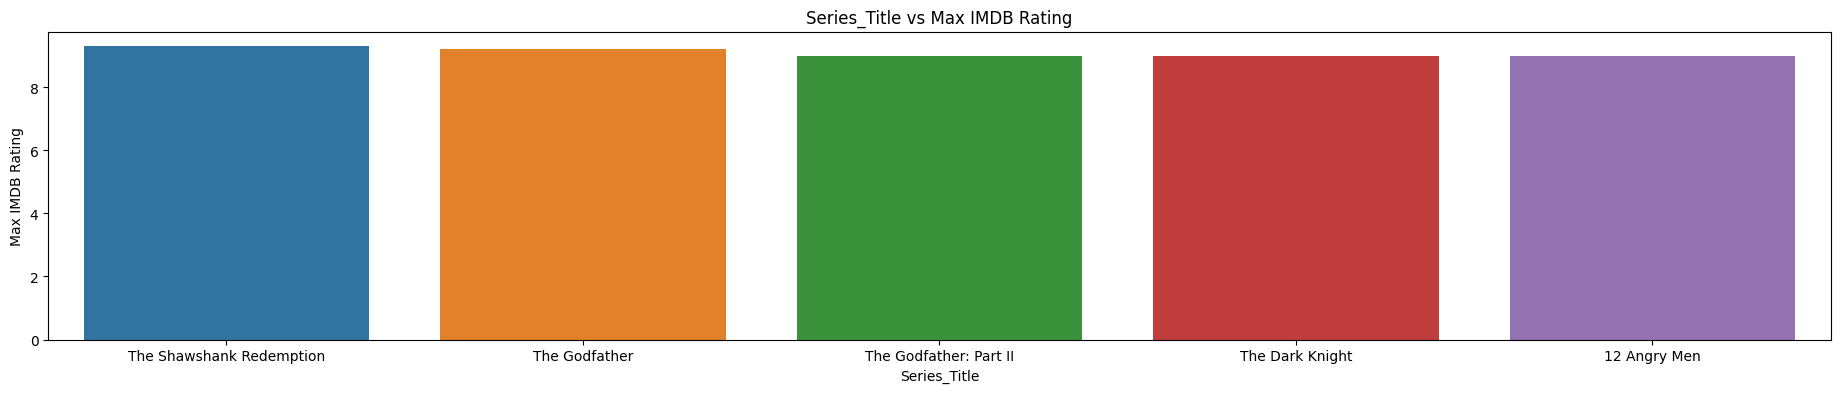

In [195]:
#top 5 movies which earn maximum rating out of 10
plt.figure(figsize=(23,4))
x=df.groupby('Series_Title')['IMDB_Rating'].max()
x1=x.sort_values(ascending=False)
x2=x1.head()
sns.barplot(x=x2.index,y=x2.values)
plt.ylabel('Max IMDB Rating')
plt.title('Series_Title vs Max IMDB Rating')
plt.show()

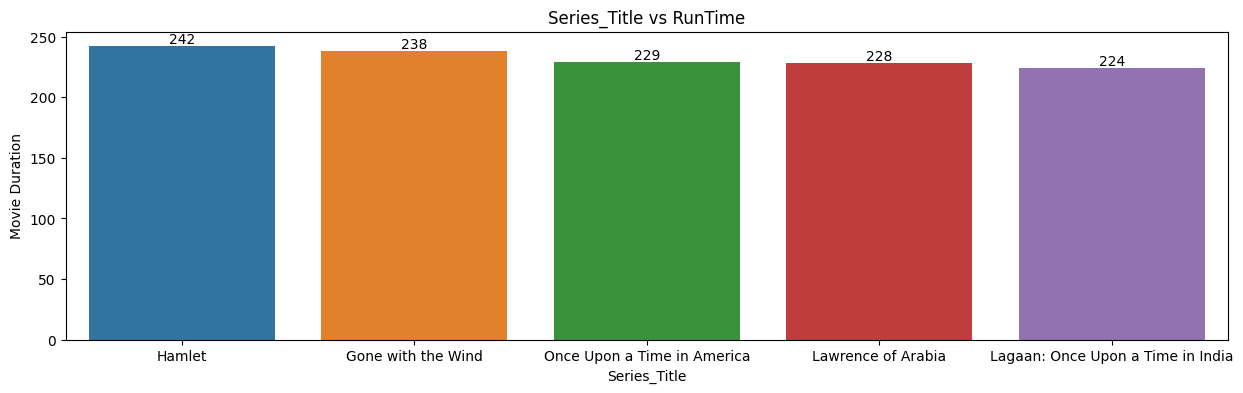

In [196]:
#Find top5 long duration movies
plt.figure(figsize=(15,4))
x=df.groupby('Series_Title')['Runtime'].max()
x1=x.sort_values(ascending=False)
x2=x1.head()
ax=sns.barplot(x=x2.index,y=x2.values)
ax.bar_label(ax.containers[0])
plt.ylabel('Movie Duration')
plt.title('Series_Title vs RunTime')
plt.show()

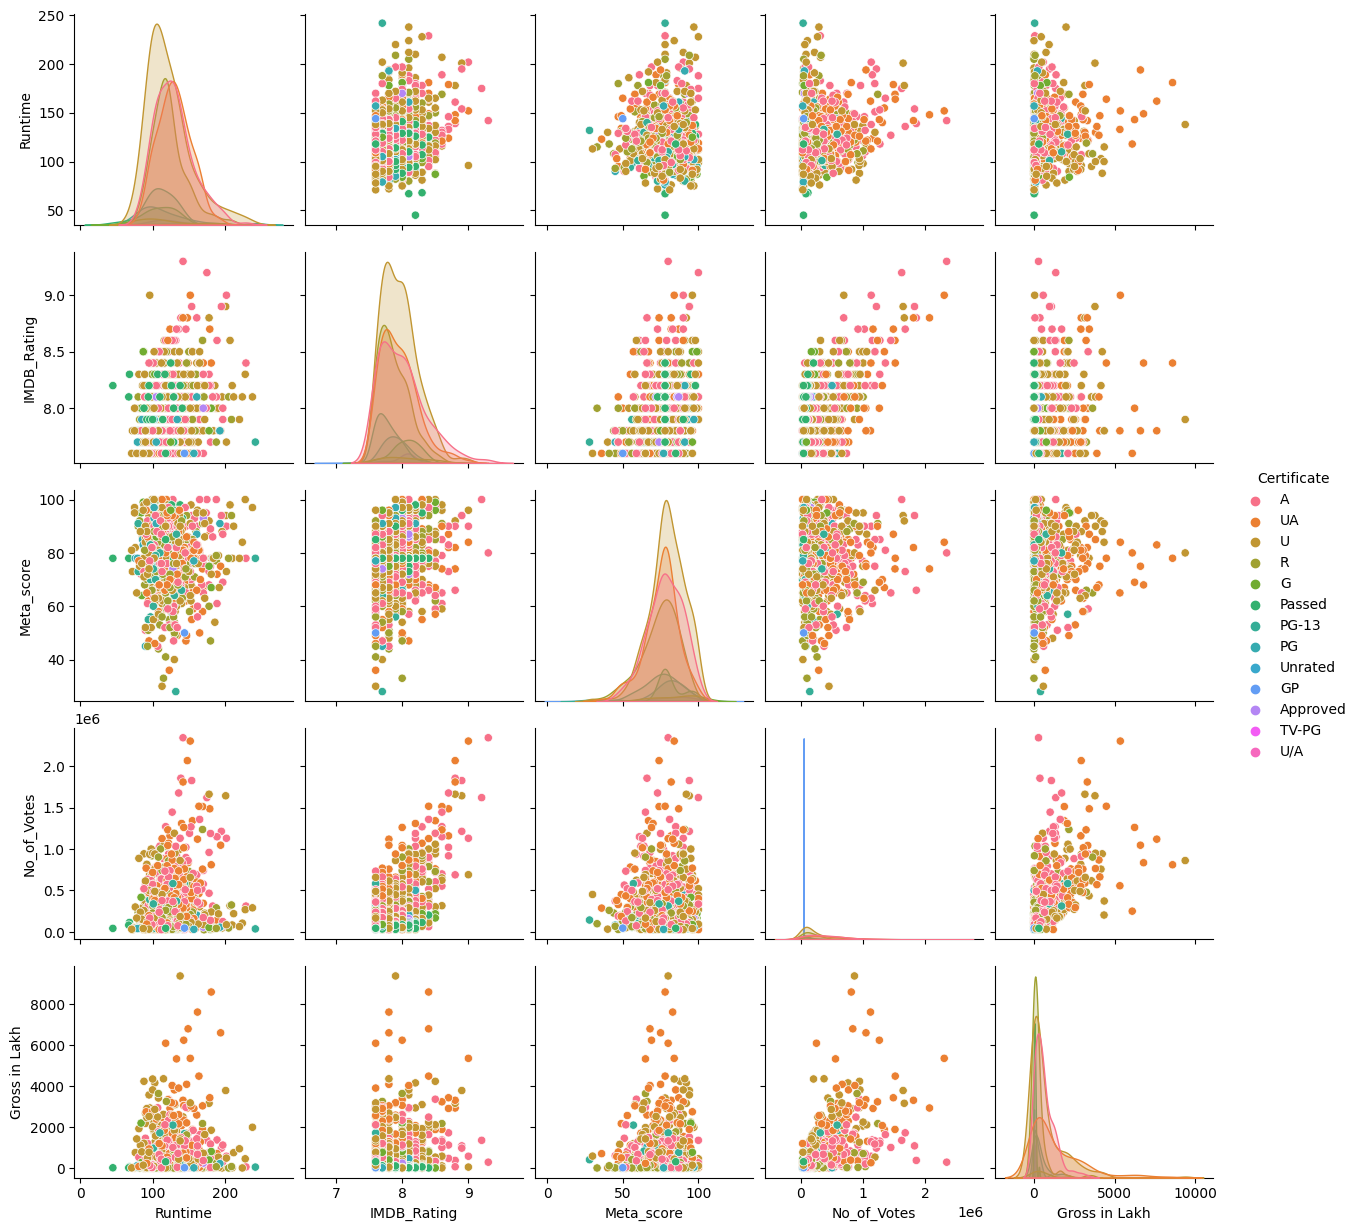

In [197]:
sns.pairplot(df,hue='Certificate')

<Axes: >

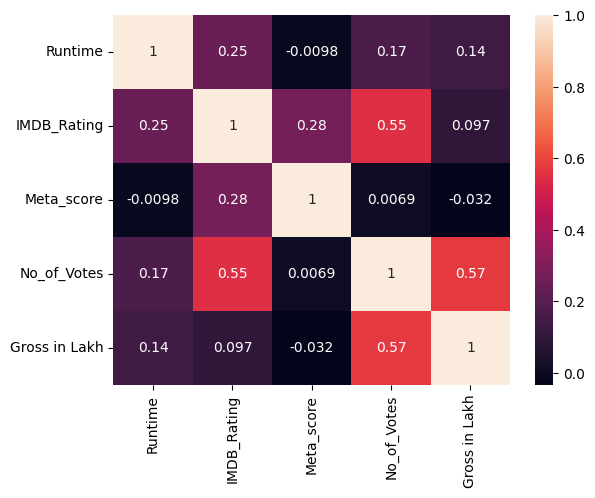

In [198]:
correlation=df.corr()
sns.heatmap(correlation,annot=True)

###Final Conclusion-

1.Find which year released maximum movies-2014

2.Find top Genre-Drama

3.which Director doing maximum number of movies in this dataset-Steven Spielberg

4.which star1 doing maximum number of movies in this dataset-Tom Hanks

5.which star2 doing maximum number of movies in this dataset- Emma Watson

6.which star3 doing maximum number of movies in this dataset-Rupert Grint

7.which star4 doing maximum number of movies in this dataset-Michael Caine

8.Which year collect maximum gross amount from movies-2009

9.Which certificate collect maximum no of votes from movies-U/A

10.Which movie collect maximum gross amount-Star wars : Episode VII

11.Which movie earn maximum rating out of 10-The Shawshank Redemption

12.Find top long duration movies-Hamlet